In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('proportions.csv', index_col = 0)
df.head()

,reportDate,filingDate,cik,ExcessReturnsEqualWeightedSnP,ExcessReturnsValueWeightedSnP,propLM,propHar,weightedLM,weightedHar
20,2016-03-31,2016-05-09,814453,0.015216,0.012411,0.025197,0.064177,0.029890,0.028893
21,2016-06-30,2016-08-09,814453,0.010468,0.012448,0.023704,0.064856,0.022210,0.023847
22,2016-09-30,2016-11-08,814453,-0.077190,-0.069763,0.025190,0.067681,0.024491,0.027398
23,2016-12-31,2017-03-01,814453,-0.000803,-0.003919,0.024698,0.068685,0.023217,0.030629
24,2017-03-31,2017-05-10,814453,0.001553,-0.002548,0.022243,0.066730,0.027645,0.030939


In [3]:
def dataPartition(df, colnameForBins, colnameForMedian):
    '''
    Given a column name, it partitions the dataframe into quantiles and get the median
    '''
    newDf = df.copy()
    quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]
    
    newDf['bins'] = pd.qcut(newDf[colnameForBins], quantiles, labels=['1st', '2nd', '3rd', '4th', '5th'])
    return newDf.groupby('bins').median()[[colnameForMedian]].reset_index()

In [4]:
newDf = df.copy()
quantiles = [0, 0.2, 0.4, 0.6, 0.8, 1]

In [5]:
newDf['bins'] = pd.qcut(newDf['propLM'], quantiles, labels=['1st', '2nd', '3rd', '4th', '5th'])
newDf[['propLM', 'bins']]

,propLM,bins
20,0.025197,3rd
21,0.023704,3rd
22,0.025190,3rd
23,0.024698,3rd
24,0.022243,2nd
...,...,...
20726,0.016148,1st
20727,0.012477,1st
20728,0.031997,4th
20729,0.019376,2nd


In [6]:
propLM = dataPartition(df, 'propLM', 'ExcessReturnsValueWeightedSnP')
propHar = dataPartition(df, 'propHar', 'ExcessReturnsValueWeightedSnP')
wPropLM = dataPartition(df, 'weightedLM', 'ExcessReturnsValueWeightedSnP')
wPropHar = dataPartition(df, 'weightedHar', 'ExcessReturnsValueWeightedSnP')

toPlot = {'LM prop': propLM, 'Har prop': propHar, 'W LM prop': wPropLM, 'W Har prop':wPropHar}

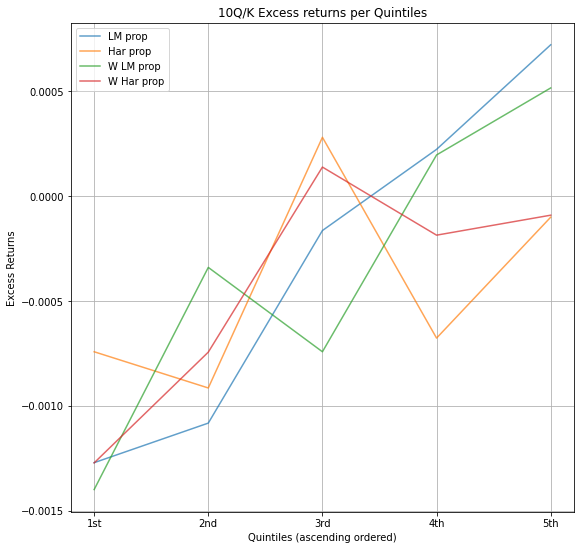

In [7]:
fig, ax = plt.subplots(1, figsize = (9, 9))

for key, value in toPlot.items():
    ax.plot(value.iloc[:, 0], value.iloc[:, 1], label = key, alpha = .7)
    
ax.set_xlabel('Quintiles (ascending ordered)')
ax.set_ylabel('Excess Returns')
ax.set_title('10Q/K Excess returns per Quintiles')
ax.legend()
ax.grid()



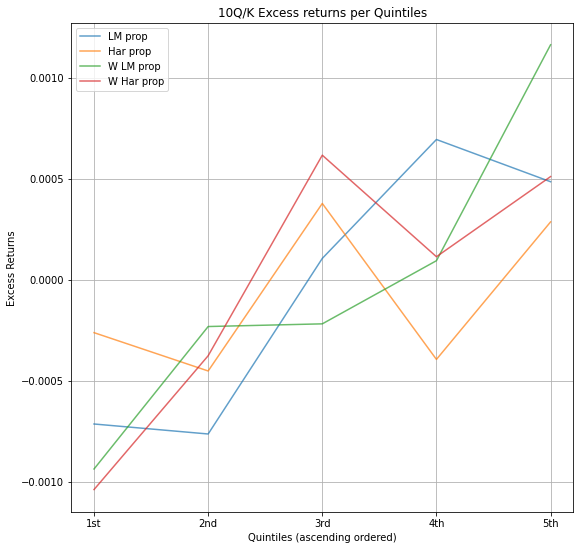

In [8]:
propLM = dataPartition(df, 'propLM', 'ExcessReturnsEqualWeightedSnP')
propHar = dataPartition(df, 'propHar', 'ExcessReturnsEqualWeightedSnP')
wPropLM = dataPartition(df, 'weightedLM', 'ExcessReturnsEqualWeightedSnP')
wPropHar = dataPartition(df, 'weightedHar', 'ExcessReturnsEqualWeightedSnP')

toPlot = {'LM prop': propLM, 'Har prop': propHar, 'W LM prop': wPropLM, 'W Har prop':wPropHar}

fig, ax = plt.subplots(1, figsize = (9, 9))

for key, value in toPlot.items():
    ax.plot(value.iloc[:, 0], value.iloc[:, 1], label = key, alpha = .7)
    
ax.set_xlabel('Quintiles (ascending ordered)')
ax.set_ylabel('Excess Returns')
ax.set_title('10Q/K Excess returns per Quintiles')
ax.legend()
ax.grid()